# Linear Regression

To simplify, Linear Regression is simply a weighted sum of inputs plus a constant:


$\hat{y} = \theta_{0} + \theta_{1}x_1 + \theta_{2}x_2 + ... + \theta_{n}x_n$


### Simple Linear Regression

Creating a simple one dimentional function of a linear relation between X and y: 

$\hat{y} = \theta_{0} + \theta_{1}x_1 $

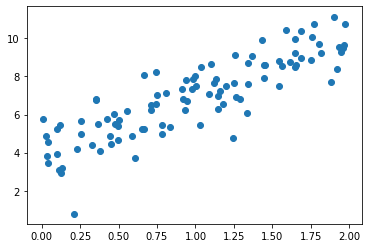

In [53]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100) 
y = 4 + 3 * X + np.random.randn(100)

data = pd.DataFrame({'covariate':X, 'response':y})

plt.scatter(X, y)

### Least Squares Estimates

the least squares estimates for $\theta_{0}$ and $\theta_{1}$ is:

$\theta_{0} = \frac{\sum_{i=0}^{n}(X_i - \hat{X_n})(Y_i - \hat{Y_n})}{\sum_{i=0}^{n}(X_i - \hat{X_n})^2} $

$\theta_{1} = \hat{Y_n} - \theta_{0} * \hat{X_n} $


In [54]:
def deviation(array):
    return [x-np.mean(array) for x in array]

def squared_deviation(array):
    return [(x-np.mean(array))**2 for x in array]

print(deviation(X)[:4])
print(squared_deviation(X)[:4])

[-0.06366439184162453, -0.2727326139358589, 0.45851269017852625, 0.15810354139870164]
[0.004053154788563908, 0.07438307870428626, 0.2102338870547492, 0.024996729802810962]


In [55]:
def least_squares_fit(X, y):
    numerator = np.sum([x_dev*y_dev for x_dev, y_dev in zip(deviation(X), deviation(y))])
    denominator = np.sum(squared_deviation(X))

    slope = numerator/denominator
    intercept = np.mean(y) - slope * np.mean(X) 

    return intercept, slope

least_squares_fit(X, y)

(3.925577383272768, 3.0577940833234885)

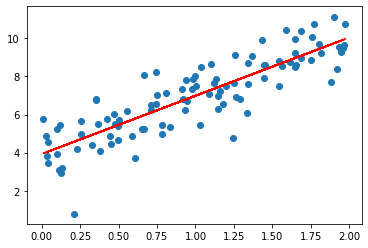

In [59]:
intercept, slope = least_squares_fit(X, y)

y_pred = intercept + X*slope

plt.scatter(X,y)
plt.plot(X, y_pred, color='red')

### Plot the residuals

There is no trend, so the linear model is not hom

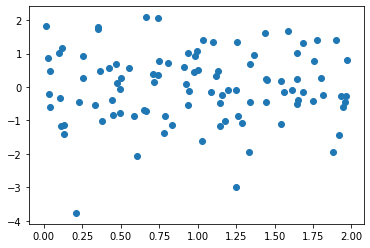

In [71]:
residuals = [ (real - pred) for real, pred in zip(y, y_pred)]
plt.scatter(X, residuals)

(array([ 1.,  1.,  1.,  4., 13., 20., 22., 19., 12.,  7.]),
 array([-3.77781934, -3.18993773, -2.60205613, -2.01417452, -1.42629291,
        -0.83841131, -0.2505297 ,  0.3373519 ,  0.92523351,  1.51311512,
         2.10099672]),
 <a list of 10 Patch objects>)

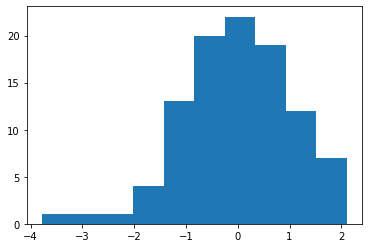

In [67]:
plt.hist(residuals)

## Multiple Linear Regression

In [58]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([3.92557738, 3.05779408])